## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [9]:
'''
1) ANS: z-test will be the appropriate hypothesis test for this situation
'''

'''
2) ANS: Conditions that needed to be followed are:
- we will need sample size first
- we will need level of significant alpha whihc is 0.05%
- Standard deviation must be known
- we need p value as well
'''


'\n2) ANS: Conditions that needed to be followed are:\n- we will need sample size first\n- we will need level of significant alpha whihc is 0.05%\n- Standard deviation must be known\n- we need p value as well\n'

In [10]:
# your code here
# 3) examination of 384 children
import pandas as pd
import math as m

#from our hypothesis of part 2
p_value = 46/384
p = 0.05

z_value = (p_value-p)/((m.sqrt(p*(1-p)))/m.sqrt(384))
print("value of z: ",z_value)
if z_value>1.96:
  print("Alternative hyphothesis accepted")
else:
  print("Null hyphothesis accepted")





value of z:  6.27512493759735
Alternative hyphothesis accepted


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 
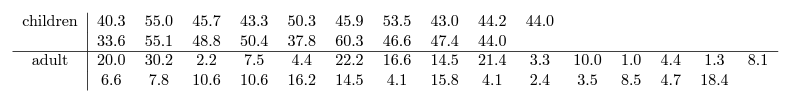

Summary for Children: 
               0
count  19.000000
mean   46.800000
std     6.418376
min    33.600000
25%    43.650000
50%    45.900000
75%    50.350000
max    60.300000


Summary for Adult: 
               0
count  29.000000
mean   10.168966
std     7.475680
min     1.000000
25%     4.100000
50%     8.100000
75%    15.800000
max    30.200000


Looking at the result for above data, it explains that mean of adult
  is way smaller that mean of the children which also resulted the standard
  deviation fot he children being less than the standard deviation of the adult


2) side-by-side boxplots and interpretation. Plot printed at last


 ANS: Based on the plot obtained from above data we can say that
Adult has high difference in sugar content than children


3) to create a 95% confidence interval for the difference in mean sugar content
95% confident interval fo children:  (34.555734866088045, 59.04426513391196)
95% confident interval fo adult:  (-4.228259682928753, 24.5661907174115

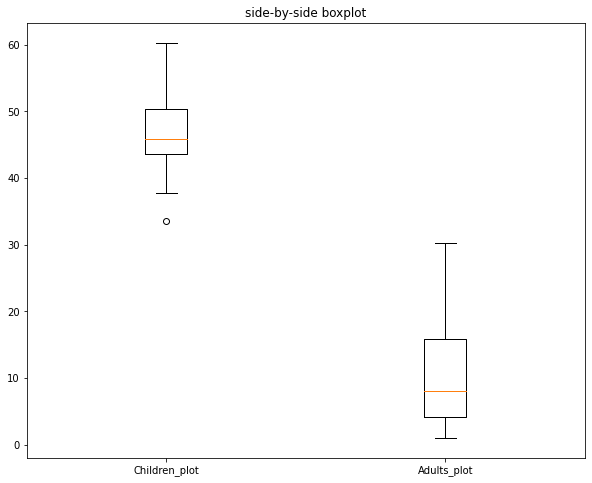

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

children_data = [40.3, 55.0, 45.7, 43.3, 50.3, 45.9, 53.5, 43.0, 44.2, 44.0, 33.6, 55.1, 48.8,
                     50.4, 37.8, 60.3, 46.6, 47.4, 44.0]
adult_data = [20.0, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 10.0, 1.0, 4.4, 1.3, 8.1,
                  6.6, 7.8, 10.6, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 4.7, 18.4]

# 1)summary of two datasets are:

print("Summary for Children: ")
print(pd.DataFrame.from_dict(children_data).describe())

print("\n\nSummary for Adult: ")
print(pd.DataFrame.from_dict(adult_data).describe())

print('''\n\nLooking at the result for above data, it explains that mean of adult
  is way smaller that mean of the children which also resulted the standard
  deviation fot he children being less than the standard deviation of the adult\n\n''')

#2) side-by-side boxplots and interpretation
plt.figure(figsize = (10, 8))
plt.boxplot([children_data, adult_data], positions = [1, 2], labels = ['Children_plot', 'Adults_plot'])
plt.title('side-by-side boxplot')
plt.show()

print("2) side-by-side boxplots and interpretation. Plot printed at last")
print('''\n\n ANS: Based on the plot obtained from above data we can say that
Adult has high difference in sugar content than children\n\n''')

# 3) to create a 95% confidence interval for the difference in mean sugar content
print("3) to create a 95% confidence interval for the difference in mean sugar content")
of_child = stats.norm.interval(0.95, np.mean(children_data), np.std(children_data))
of_adult = stats.norm.interval(0.95, np.mean(adult_data), np.std(adult_data))
print("95% confident interval fo children: ", of_child)
print("95% confident interval fo adult: ", of_adult)


In [12]:
# your code here



### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [13]:
!pip install krippendorff
# your code here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import cohen_kappa_score
import krippendorff

data_set=pd.read_csv('lab08-dataset.csv')

label = LabelEncoder()
label.fit(data_set['Annotation1'])

data_set['label_A1'] = label.transform(data_set['Annotation1'])
data_set['label_A2'] = label.transform(data_set['Annotation2'])
data_set['label_A3'] = label.transform(data_set['Annotation3'])

score_no_1 = cohen_kappa_score(list(data_set['label_A1'].values), list(data_set['label_A2'].values))
score_no_2 = cohen_kappa_score(list(data_set['label_A2'].values), list(data_set['label_A3'].values))
score_no_3 = cohen_kappa_score(list(data_set['label_A3'].values), list(data_set['label_A1'].values))

avg_of_three_score = (score_no_1 + score_no_2 + score_no_3)/3
print("Final Cohen's kappa score:", round(avg_of_three_score, 2))

if avg_of_three_score < 0.0:
    print("Less than chance agreement")

elif ((avg_of_three_score >= 0.01) & (avg_of_three_score <= 0.20)):
    print("Slight agreement")

elif ((avg_of_three_score >= 0.21) and (avg_of_three_score <= 0.40)):
    print("Fair agreement")

elif ((avg_of_three_score >= 0.41) and (avg_of_three_score <= 0.60)):
    print("Moderate agreement")

elif ((avg_of_three_score >= 0.61) and (avg_of_three_score <= 0.80)):
    print("Substantial agreement")

elif ((avg_of_three_score >= 0.81) and (avg_of_three_score <= 0.99)):
    print("Almost perfect agreement")

data_value_1 = [list(data_set['label_A1'].values),
        list(data_set['label_A2'].values),
        list(data_set['label_A3'].values)]

score_for_fleiss = krippendorff.alpha(data_value_1)
print("\nFinal Fleiss score obtained: ", round(score_for_fleiss, 2))
# your code here




[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Final Cohen's kappa score: 0.54
Moderate agreement

Final Fleiss score obtained:  0.57
